In [1]:
import sys
import numpy as np
import math
sys.path.append("../build/python")  # set to correct path for module
import varttpy

In [2]:
#tmat=np.loadtxt("../examples/ex11_irlm/data/t_IRLM_NRG_N32_U-0.5_t0.15_Lambda2.0_ed0_Nkept150.dat")
#Pmat=np.loadtxt("../examples/ex11_irlm/data/P_IRLM_NRG_N32_U-0.5_t0.15_Lambda2.0_ed0_Nkept150.dat")
tmat=np.loadtxt("../examples/ex11_irlm/data/t_IRLM_NRG_N16_U-0.5_V0.15_Lambda2.0_ed0.0_Nkept200.dat")
Pmat=np.loadtxt("../examples/ex11_irlm/data/P_IRLM_NRG_N16_U-0.5_V0.15_Lambda2.0_ed0.0_Nkept200.dat")

In [3]:
model=varttpy.IRLM(tmat, Pmat, U=-0.5)
sol=varttpy.DMRG(model.Ham())

In [4]:
sol.bond_dim=128
sol.nIter_diag=64
Npart=model.NParticle();
print("sweep energy Npart")
for i in range(10):
    sol.iterate()
    print(i+1, sol.energy, sol.Expectation(Npart))

cc=model.CalculateCiCj(sol.gs)
eval=np.sort( np.linalg.eigvals(cc) )

sweep energy Npart
1 -1.4036858310815563 8.000000000124908
2 -1.4036858311901614 7.999999999999832
3 -1.4036858311901597 7.999999999999811
4 -1.4036858311901679 7.999999999999849
5 -1.4036858311901617 7.999999999999822
6 -1.4036858311901539 7.999999999999799
7 -1.4036858311901559 7.9999999999998055
8 -1.4036858311901592 7.999999999999829
9 -1.403685831190161 7.999999999999859
10 -1.4036858311901546 7.999999999999823


In [5]:
sol=varttpy.DMRG(model.Ham(), sol.gs)
print("sweep energy Npart")
for i in range(10):
    sol.iterate()
    print(i+1, sol.energy, sol.Expectation(Npart))

cc=model.CalculateCiCj(sol.gs)
eval=np.sort( np.linalg.eigvals(cc) )

sweep energy Npart
1 -1.4036858311834939 7.99999999999981
2 -1.4036858311833627 7.999999999999804
3 -1.403685831183238 7.999999999999785
4 -1.4036858311831175 7.999999999999815
5 -1.4036858311829876 7.99999999999983
6 -1.4036858311828622 7.999999999999842
7 -1.403685831182727 7.999999999999805
8 -1.4036858311826013 7.99999999999984
9 -1.4036858311824578 7.99999999999978
10 -1.4036858311823335 7.9999999999998055


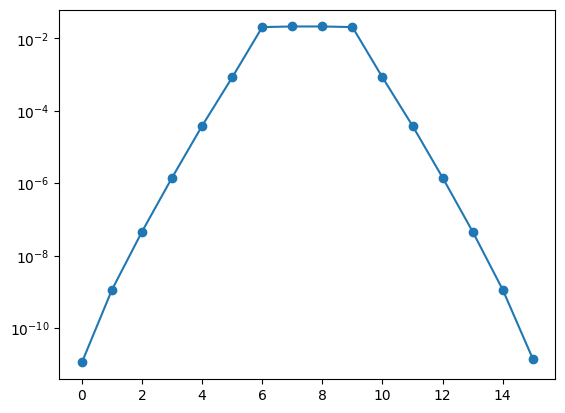

In [6]:
import matplotlib.pyplot as plt
plt.yscale('log')
plt.plot([min(x,1-x) for x in eval], '-o')

In [10]:
print("Npart=",sol.Expectation(Npart))
print("H2-E^2 sigma/E")
ener=sol.Expectation(model.Ham())
m=sol.bond_dim
for mi in [m//2, m, 2*m, 3*m, 4*m]:
    print(sol.H2(mi)/ener**2-1, sol.sigma(mi)/sol.energy  )

Npart= 7.9999999999998055
H2-E^2 sigma/E
1.9192895273079102e-08 -2.2401799929694086e-07
4.46656045482996e-11 -5.605414283629909e-07
4.749756143951345e-12 -2.1524784106999427e-06
4.687139565362486e-12 -2.1655828791238645e-06
4.686695476152636e-12 -2.165616617756716e-06
